Download Data from Here : https://statso.io/fashion-recommendations-using-image-features-case-study/

In [7]:
from zipfile import ZipFile
import os

zip_file_path = '/content/women-fashion.zip'
extraction_directory = '/content/women_fashion/'

if not os.path.exists(extraction_directory):
    os.makedirs(extraction_directory)

with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_directory)

extracted_files = os.listdir(extraction_directory)
print(extracted_files[:10])

['women fashion', '__MACOSX']


In [8]:
# correcting the path to include the 'women fashion' directory and listing its contents
extraction_directory_updated = os.path.join(extraction_directory, 'women fashion')

# list the files in the updated directory
extracted_files_updated = os.listdir(extraction_directory_updated)
extracted_files_updated[:10], len(extracted_files_updated)

(['high-waisted white trousers paired with a structured, corset-style bodice featuring mesh.jpg',
  'long, intricately designed dress with full sleeves.jpg',
  'long, flowing, pink dress with a sparkly texture.jpg',
  'off-the-shoulder black ball gown.jpg',
  'fitted black dress that reaches down to mid-calf.jpg',
  'cream-colored, long, open-front coat with wide lapels.jpg',
  'dress with a classic black and white houndstooth pattern.jpg',
  'white knee-length dress with a fitted design and long sleeves.webp',
  'blue dress with a floral pattern.jpg',
  'bright red, form-fitting, strapless dress with a high slit on one side revealing part of the leg.jpg'],
 97)

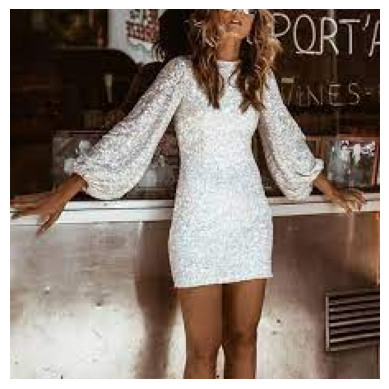

In [23]:
from PIL import Image
import matplotlib.pyplot as plt

# function to load and display an image
def display_image(file_path):
    image = Image.open(file_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# display the first image to understand its characteristics
first_image_path = os.path.join(extraction_directory_updated, extracted_files_updated[10  ])
display_image(first_image_path)

In [11]:
import glob

# directory path containing your images
image_directory = '/content/women_fashion/women fashion'

image_paths_list = [file for file in glob.glob(os.path.join(image_directory, '*.*')) if file.endswith(('.jpg', '.png', '.jpeg', 'webp'))]

# print the list of image file paths
print(image_paths_list)

['/content/women_fashion/women fashion/high-waisted white trousers paired with a structured, corset-style bodice featuring mesh.jpg', '/content/women_fashion/women fashion/long, intricately designed dress with full sleeves.jpg', '/content/women_fashion/women fashion/long, flowing, pink dress with a sparkly texture.jpg', '/content/women_fashion/women fashion/off-the-shoulder black ball gown.jpg', '/content/women_fashion/women fashion/fitted black dress that reaches down to mid-calf.jpg', '/content/women_fashion/women fashion/cream-colored, long, open-front coat with wide lapels.jpg', '/content/women_fashion/women fashion/dress with a classic black and white houndstooth pattern.jpg', '/content/women_fashion/women fashion/white knee-length dress with a fitted design and long sleeves.webp', '/content/women_fashion/women fashion/blue dress with a floral pattern.jpg', '/content/women_fashion/women fashion/bright red, form-fitting, strapless dress with a high slit on one side revealing part o

In [12]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded)

def extract_features(model, preprocessed_img):
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / np.linalg.norm(flattened_features)
    return normalized_features

all_features = []
all_image_names = []

for img_path in image_paths_list:
    preprocessed_img = preprocess_image(img_path)
    features = extract_features(model, preprocessed_img)
    all_features.append(features)
    all_image_names.append(os.path.basename(img_path))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 824ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 860ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 862ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 857ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 733ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
1/1 ━━━━━━━━━

In [13]:
from scipy.spatial.distance import cosine

def recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=5):
    # pre-process the input image and extract features
    preprocessed_img = preprocess_image(input_image_path)
    input_features = extract_features(model, preprocessed_img)

    # calculate similarities and find the top N similar images
    similarities = [1 - cosine(input_features, other_feature) for other_feature in all_features]
    similar_indices = np.argsort(similarities)[-top_n:]

    # filter out the input image index from similar_indices
    similar_indices = [idx for idx in similar_indices if idx != all_image_names.index(input_image_path)]

    # display the input image
    plt.figure(figsize=(15, 10))
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(Image.open(input_image_path))
    plt.title("Input Image")
    plt.axis('off')

    # display similar images
    for i, idx in enumerate(similar_indices[:top_n], start=1):
        image_path = os.path.join('/content/women_fashion/women fashion', all_image_names[idx])
        plt.subplot(1, top_n + 1, i + 1)
        plt.imshow(Image.open(image_path))
        plt.title(f"Recommendation {i}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


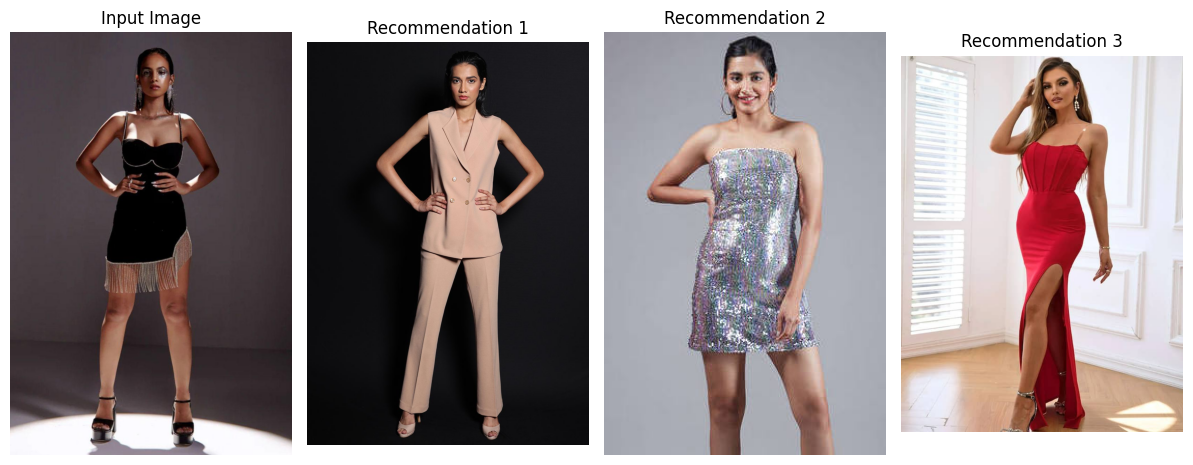

In [22]:
input_image_path = '/content/women_fashion/women fashion/black top with spaghetti straps and a black skirt adorned with a fringe detail at the hem.jpg'
recommend_fashion_items_cnn(input_image_path, all_features, image_paths_list, model, top_n=4)

In [16]:
all_image_names

['high-waisted white trousers paired with a structured, corset-style bodice featuring mesh.jpg',
 'long, intricately designed dress with full sleeves.jpg',
 'long, flowing, pink dress with a sparkly texture.jpg',
 'off-the-shoulder black ball gown.jpg',
 'fitted black dress that reaches down to mid-calf.jpg',
 'cream-colored, long, open-front coat with wide lapels.jpg',
 'dress with a classic black and white houndstooth pattern.jpg',
 'white knee-length dress with a fitted design and long sleeves.webp',
 'blue dress with a floral pattern.jpg',
 'bright red, form-fitting, strapless dress with a high slit on one side revealing part of the leg.jpg',
 'sparkling white dress with long sleeves.jpg',
 'black jumpsuit with a diagonal stripe of glittering material running across the body.jpg',
 'long, elegant blue dress with an off-the-shoulder design with sheer sleeves.jpg',
 'ladies-party-wear-cotton-short-dress-full.jpg',
 'fitted, cream-colored dress with long sheer sleeves.jpg',
 'Latest-P